In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\eurya\OneDrive\Documents\prostate.txt', sep=' ')

In [5]:
print(df.head())
print(df.info())

    vol    wht  age    bh    pc   psa
0  0.56  15.95   50  0.25  0.25  0.65
1  0.37  27.65   58  0.25  0.25  0.85
2  0.60  14.75   74  0.25  0.25  0.85
3  0.30  26.65   58  0.25  0.25  0.85
4  2.12  30.95   62  0.25  0.25  1.45
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   vol     80 non-null     float64
 1   wht     80 non-null     float64
 2   age     80 non-null     int64  
 3   bh      80 non-null     float64
 4   pc      80 non-null     float64
 5   psa     80 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 3.9 KB
None


In [6]:
print("Nombre d'observations :", df.shape[0])
print("Nombre de variables :", df.shape[1])

Nombre d'observations : 80
Nombre de variables : 6


In [7]:
print("\nValeurs manquantes par variable :")
print(df.isnull().sum())


Valeurs manquantes par variable :
vol    0
wht    0
age    0
bh     0
pc     0
psa    0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
print("Statistiques descriptives :")
print(df.describe())

Statistiques descriptives :
             vol         wht        age         bh         pc         psa
count  80.000000   80.000000  80.000000  80.000000  80.000000   80.000000
mean    6.771500   41.581250  63.612500   2.691750   2.188750   25.472500
std     8.000974   18.351998   7.897274   2.989996   3.677695   44.306436
min     0.300000   10.750000  41.000000   0.250000   0.250000    0.650000
25%     1.650000   29.200000  60.000000   0.250000   0.250000    6.125000
50%     3.565000   38.300000  65.000000   1.300000   0.450000   14.400000
75%     8.060000   48.475000  68.000000   5.075000   1.875000   21.350000
max    45.650000  111.950000  79.000000  10.240000  18.250000  265.850000


=== STATISTIQUES DESCRIPTIVES ===
             vol         wht        age         bh         pc         psa
count  80.000000   80.000000  80.000000  80.000000  80.000000   80.000000
mean    6.771500   41.581250  63.612500   2.691750   2.188750   25.472500
std     8.000974   18.351998   7.897274   2.989996   3.677695   44.306436
min     0.300000   10.750000  41.000000   0.250000   0.250000    0.650000
25%     1.650000   29.200000  60.000000   0.250000   0.250000    6.125000
50%     3.565000   38.300000  65.000000   1.300000   0.450000   14.400000
75%     8.060000   48.475000  68.000000   5.075000   1.875000   21.350000
max    45.650000  111.950000  79.000000  10.240000  18.250000  265.850000




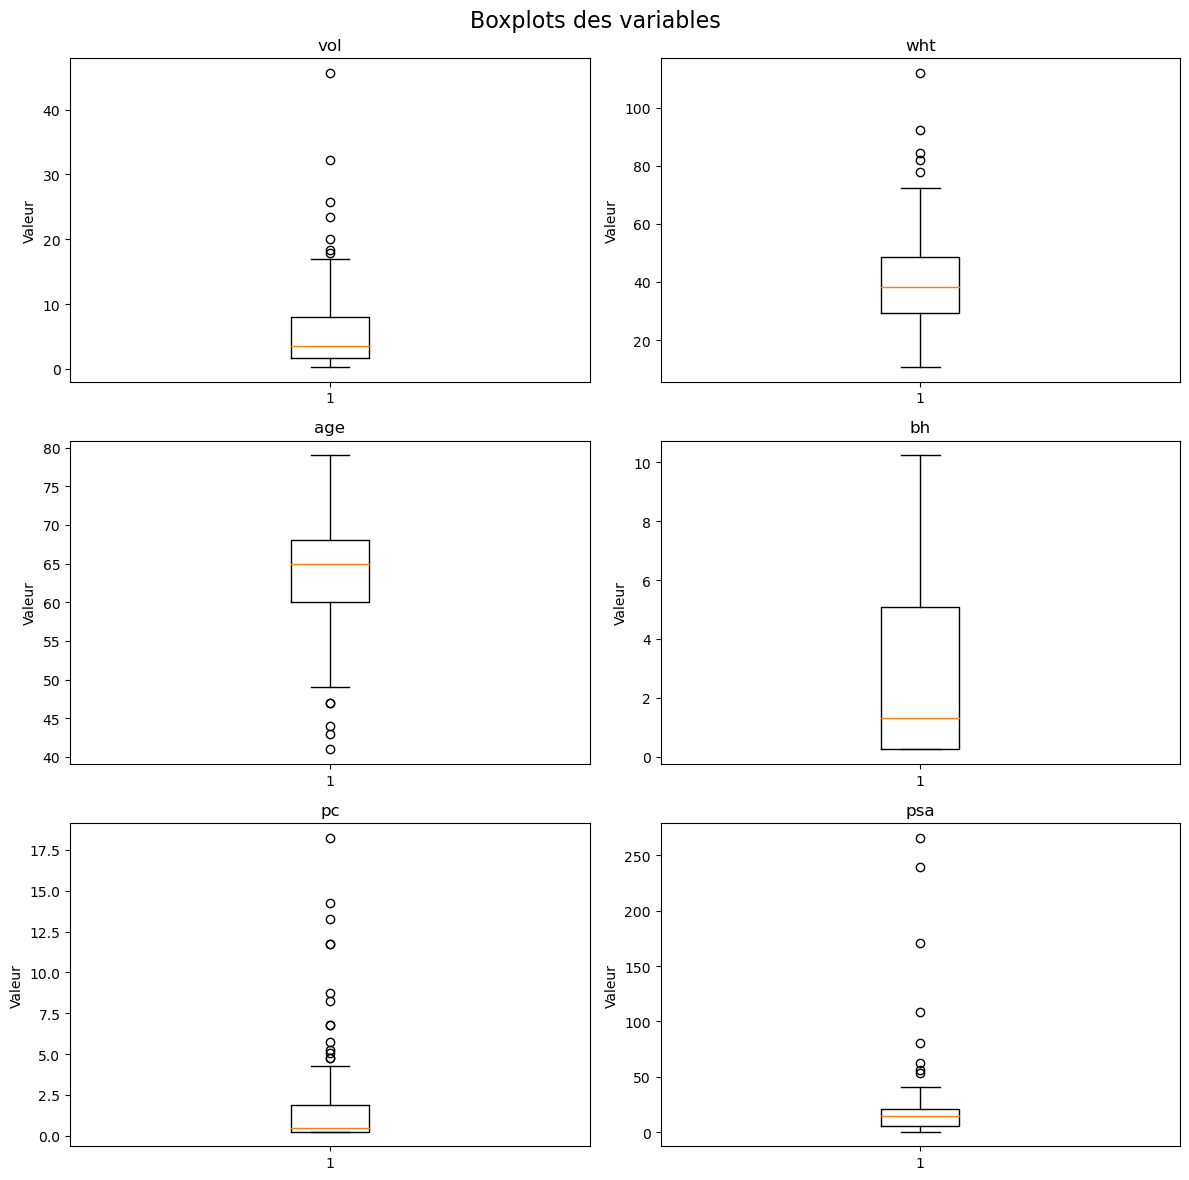

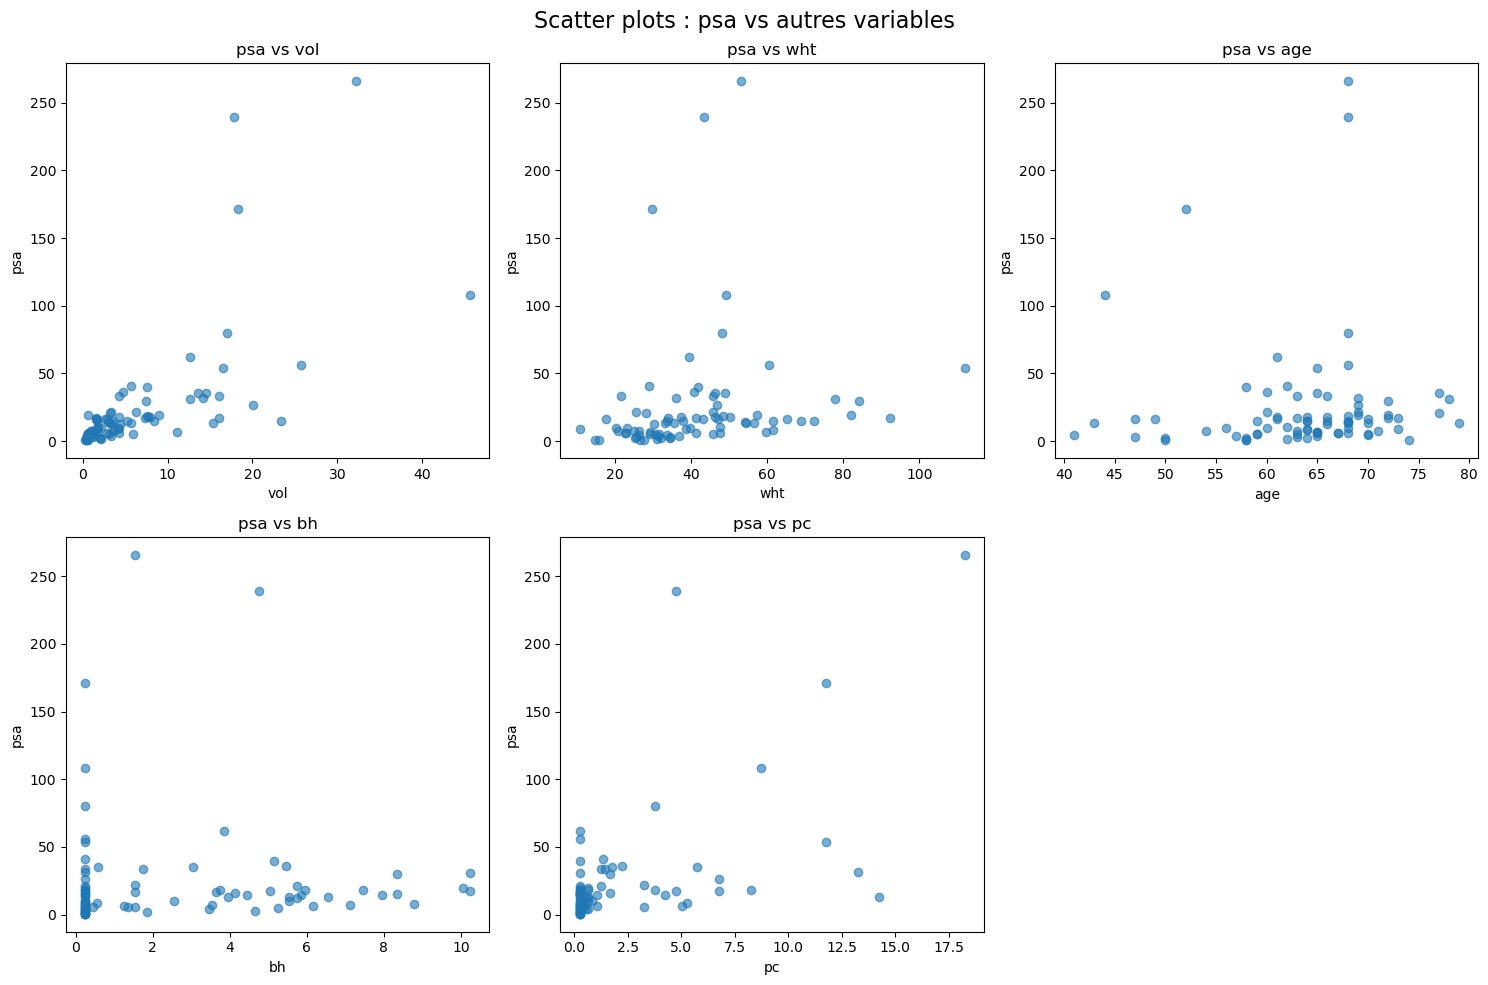

In [19]:
# Charger le fichier
df = pd.read_csv(r'C:\Users\eurya\OneDrive\Documents\prostate.txt', sep=' ')

# Statistiques descriptives
print("=== STATISTIQUES DESCRIPTIVES ===")
print(df.describe())
print("\n")

# Boxplots pour chaque variable
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Boxplots des variables', fontsize=16)
axes = axes.ravel()

for i, colonne in enumerate(df.columns):
    axes[i].boxplot(df[colonne])
    axes[i].set_title(colonne)
    axes[i].set_ylabel('Valeur')

plt.tight_layout()
plt.show()

# Scatter plots de psa vs les autres variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter plots : psa vs autres variables', fontsize=16)
axes = axes.ravel()

autres_vars = ['vol', 'wht', 'age', 'bh', 'pc']
for i, var in enumerate(autres_vars):
    axes[i].scatter(df[var], df['psa'], alpha=0.6)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('psa')
    axes[i].set_title(f'psa vs {var}')

# Cacher le 6ème subplot vide
axes[5].axis('off')

plt.tight_layout()
plt.show()

Nouvelles colonnes créées :
['vol', 'wht', 'age', 'bh', 'pc', 'psa', 'lvol', 'lwht', 'lbh', 'lpc', 'lpsa']


=== STATISTIQUES APRÈS TRANSFORMATION LOG ===
            lvol       lwht        age        lbh        lpc       lpsa
count  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000
mean    1.288458   3.637556  63.612500   0.096931  -0.265689   2.507034
std     1.186833   0.430473   7.897274   1.470575   1.366742   1.201612
min    -1.203973   2.374906  41.000000  -1.386294  -1.386294  -0.430783
25%     0.500551   3.374164  60.000000  -1.386294  -1.386294   1.812354
50%     1.271155   3.645381  65.000000   0.261624  -0.798508   2.667174
75%     2.086639   3.881038  68.000000   1.624290   0.622444   3.061019
max     3.821004   4.718052  79.000000   2.326302   2.904165   5.582932


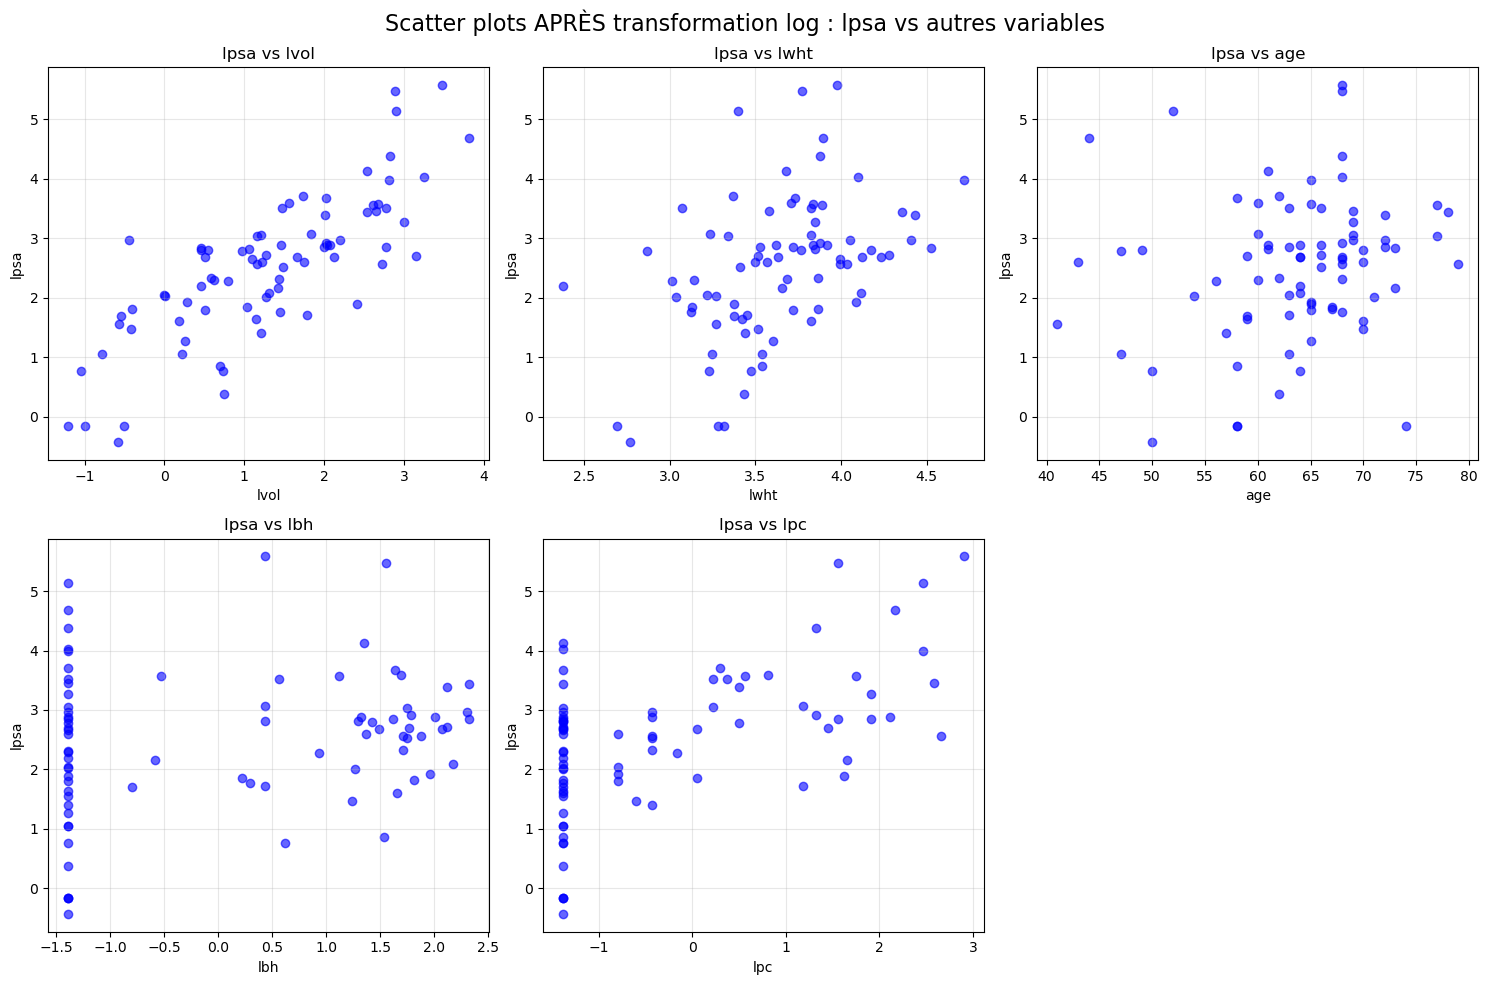

In [20]:
# Transformation logarithmique (toutes les variables SAUF age)
df['lvol'] = np.log(df['vol'])
df['lwht'] = np.log(df['wht'])
df['lbh'] = np.log(df['bh'])
df['lpc'] = np.log(df['pc'])
df['lpsa'] = np.log(df['psa'])

# Vérifier les nouvelles colonnes
print("Nouvelles colonnes créées :")
print(df.columns.tolist())
print("\n")

# Statistiques des variables transformées
print("=== STATISTIQUES APRÈS TRANSFORMATION LOG ===")
print(df[['lvol', 'lwht', 'age', 'lbh', 'lpc', 'lpsa']].describe())

# Nouveaux scatter plots avec variables transformées
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter plots APRÈS transformation log : lpsa vs autres variables', fontsize=16)
axes = axes.ravel()

vars_log = ['lvol', 'lwht', 'age', 'lbh', 'lpc']
for i, var in enumerate(vars_log):
    axes[i].scatter(df[var], df['lpsa'], alpha=0.6, color='blue')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('lpsa')
    axes[i].set_title(f'lpsa vs {var}')
    axes[i].grid(True, alpha=0.3)

axes[5].axis('off')

plt.tight_layout()
plt.show()